# Probabilistic Learning

<center><img src="images/bayes_net_example.png" width=50%></center>

In [1]:
# Importing the necessary libaries
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
%matplotlib inline

# Loading the dataset
mitbih_test = pd.read_csv("datasets/heartbeat/mitbih_test.csv", header = None)
mitbih_train = pd.read_csv("datasets/heartbeat/mitbih_train.csv", header = None)

# Class dict
class_dict ={
    0.: 'N',
    1.: 'S',
    2.: 'V',
    3.: 'F',
    4.: 'Q'    
}

### Visualizing the data

In [29]:
mitbih_test_X = mitbih_test.iloc[:, :-1].T
mitbih_test_Y = mitbih_test.iloc[:, -1].to_frame()

mitbih_train_X = mitbih_train.iloc[:, :-1].T
mitbih_train_Y = mitbih_train.iloc[:, -1].to_frame()

mitbih_test_X["time"] = np.arange(mitbih_test_X.shape[0]) * 1/125
mitbih_test_Y["time"] = np.arange(mitbih_test_Y.shape[0]) * 1/125

mitbih_train_X["time"] = np.arange(mitbih_train_X.shape[0]) * 1/125
mitbih_train_Y["time"] = np.arange(mitbih_train_Y.shape[0]) * 1/125

mitbih_train_X.head(10)

(21892, 1)


,0,1,2,3,4,5,6,7,8,9,...,87545,87546,87547,87548,87549,87550,87551,87552,87553,time
0,0.977941,0.960114,1.000000,0.925414,0.967136,0.927461,0.423611,0.716814,0.874214,1.000000,...,0.799242,0.757235,0.717325,1.000000,0.807018,0.718333,0.906122,0.858228,0.901506,0.000
1,0.926471,0.863248,0.659459,0.665746,1.000000,1.000000,0.791667,0.539823,0.849057,0.996086,...,0.515152,0.663987,0.627660,0.405594,0.494737,0.605000,0.624490,0.645570,0.845886,0.008
2,0.681373,0.461538,0.186486,0.541436,0.830986,0.626943,1.000000,0.283186,0.480084,0.694716,...,0.545455,0.561093,0.534954,0.440559,0.536842,0.486667,0.595918,0.845570,0.800695,0.016
3,0.245098,0.196581,0.070270,0.276243,0.586854,0.193437,0.256944,0.129794,0.058700,0.336595,...,0.553030,0.453376,0.427052,0.405594,0.529825,0.361667,0.575510,0.248101,0.748552,0.024
4,0.154412,0.094017,0.070270,0.196133,0.356808,0.094991,0.000000,0.064897,0.090147,0.238748,...,0.526515,0.324759,0.322188,0.405594,0.491228,0.231667,0.530612,0.167089,0.687138,0.032
5,0.191176,0.125356,0.059459,0.077348,0.248826,0.072539,0.277778,0.076696,0.310273,0.268102,...,0.503788,0.218650,0.215805,0.384615,0.484211,0.120000,0.481633,0.131646,0.599073,0.040
6,0.151961,0.099715,0.056757,0.071823,0.145540,0.043178,0.465278,0.026549,0.387841,0.191781,...,0.424242,0.144695,0.136778,0.374126,0.456140,0.051667,0.444898,0.121519,0.512167,0.048
7,0.085784,0.088319,0.043243,0.060773,0.089202,0.053541,0.520833,0.032448,0.385744,0.174168,...,0.344697,0.106109,0.068389,0.318182,0.396491,0.001667,0.387755,0.121519,0.427578,0.056
8,0.058824,0.074074,0.054054,0.066298,0.117371,0.093264,0.472222,0.008850,0.389937,0.164384,...,0.196970,0.085209,0.042553,0.279720,0.284211,0.000000,0.322449,0.118987,0.395133,0.064
9,0.049020,0.082621,0.045946,0.058011,0.150235,0.189983,0.555556,0.044248,0.392034,0.187867,...,0.034091,0.120579,0.039514,0.167832,0.136842,0.013333,0.191837,0.103797,0.402086,0.072


In [23]:
mitbih_test_Y["class_id"] = mitbih_test_Y.iloc[:, 0]
mitbih_test_Y["class_name"] = mitbih_test_Y.loc[:, "class_id"].apply(lambda x: class_dict[x])
mitbih_test_Y.drop(mitbih_test_Y.columns[0], axis = 1, inplace = True)
mitbih_test_Y.head(10)

,time,class_id,class_name
0,0.000,0.0,N
1,0.008,0.0,N
2,0.016,0.0,N
3,0.024,0.0,N
4,0.032,0.0,N
5,0.040,0.0,N
6,0.048,0.0,N
7,0.056,0.0,N
8,0.064,0.0,N
9,0.072,0.0,N


In [28]:
print(mitbih_test_Y.shape)
print(mitbih_test_X.shape)
print(mitbih_test.shape)
mitbih_test.head()

(21892, 3)
(187, 21893)
(21892, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
mitbih_test_Y.loc[mitbih_test_Y["class_name"] == "f"]

,time,class_id,class_name
18674,149.392,2.0,V
18675,149.400,2.0,V
18676,149.408,2.0,V
18677,149.416,2.0,V
18678,149.424,2.0,V
18679,149.432,2.0,V
18680,149.440,2.0,V
18681,149.448,2.0,V
18682,149.456,2.0,V
18683,149.464,2.0,V


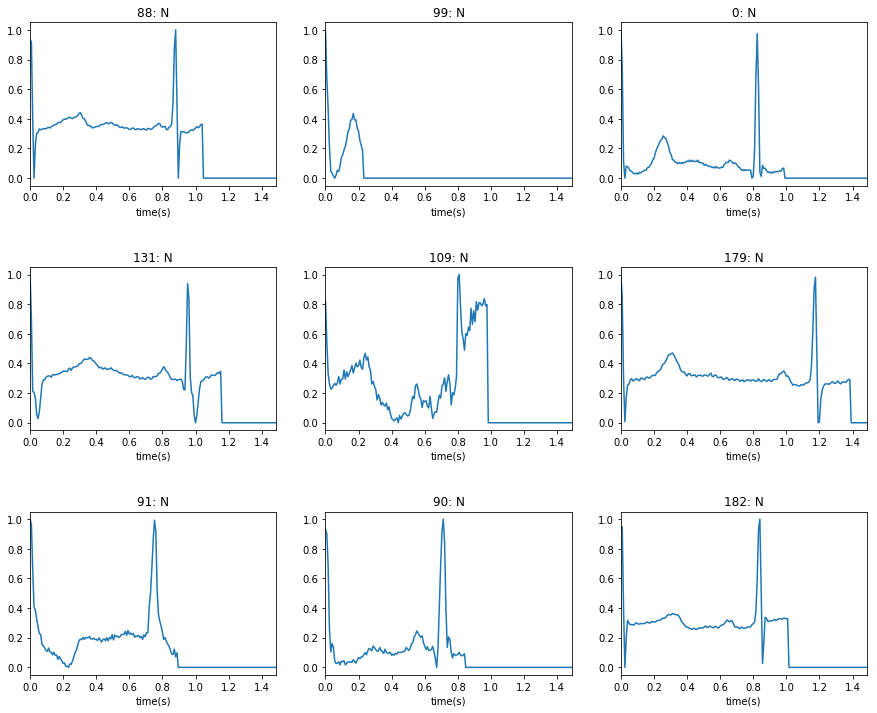

In [12]:
rnd_samples = np.random.choice(np.arange(mitbih_test_X.shape[0]), 9)
num_plots = 9
plt_cols = 3

fig, axes = plt.subplots(nrows=np.int32(np.ceil(num_plots/plt_cols)), ncols=plt_cols, figsize = (plt_cols * 5, np.int32(np.ceil(num_plots/plt_cols) * 4)))
axes = axes.flatten()

for idx, ax in zip(rnd_samples, axes):
    mitbih_test_X.plot(x = "time", y = idx, kind = "line", ax = ax, legend = False)
    ax.set_title("".join([str(idx),": ",mitbih_test_Y.loc[idx, "class_name"]]))
    ax.set_xlabel("time(s)")
    
plt.subplots_adjust(hspace=0.5)